# **Business Objective: Recommending Songs Based On Music Qualities**

A person's mood dictates song choice. Whether he/she is happy or sad, calm or angry, active or just relaxing, audio-streaming platforms, such as Spotify and Pandora, can recommend songs based on the ones that he/she listens to. Here, we use a **K-means clustering** algorithm that recommends song choices based on a previously listened song's energy and valence. Please go [here](https://www.kaggle.com/rafaelnduarte/spotify-data-with-audio-features) for the dataset description.

**Valence** describes the musical positiveness (from 0.0 to 1.0) conveyed by a track. The higher the value, the greater the positivity.

**Energy** represents a perceptual measure (from 0.0 to 1.0) of intensity and activity. The higher the value, the greater the intensity/activity.

## Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset

In [ ]:
# Grab Energy and Valence columns
dataset = pd.read_csv('spotify_world.csv')
X = dataset.iloc[:, [6, 14]].values
X.shape

(9320, 2)

In [ ]:
dataset.head(10)

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,99,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
1,1,Travis Scott,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,98,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
2,2,Juice WRLD,Bandit (with YoungBoy Never Broke Again),6Gg1gjgKi2AK4e0qzsR7sd,93,0.474,0.631,5,-5.884,0,0.3430,0.0687,0.000000,0.1320,0.4250,180.051,189323,4
3,3,Arizona Zervas,ROXANNE,696DnlkuDOXcMAnKlTgXXK,97,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.4570,116.735,163636,5
4,4,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.505,0.340,4,-9.005,1,0.0438,0.5760,0.000000,0.2100,0.0916,101.993,206459,4
5,5,Billie Eilish,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,98,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
6,6,blackbear,hot girl bummer,7aiClxsDWFRQ0Kzk5KI5ku,97,0.778,0.559,6,-7.109,0,0.0776,0.1280,0.000000,0.3990,0.6780,129.989,185093,1
7,7,Maroon 5,Memories,2b8fOow8UzyDFAE27YhOZM,100,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
8,8,DaBaby,BOP,6Ozh9Ok6h4Oi1wUSLtBseN,91,0.769,0.787,11,-3.909,1,0.3670,0.1890,0.000000,0.1290,0.8360,126.770,159715,4
9,9,YNW Melly,223's (feat. 9lokknine),4sjiIpEv617LDXaidKioOI,90,0.932,0.547,0,-7.787,0,0.3330,0.0388,0.000000,0.0924,0.6950,94.998,176640,4


We take the 'energy' and 'valence' columns only for our Feature X

## Null Values

In [ ]:
# Check for null values in all columns
null_count = dataset.isnull().sum()
null_pct = ((dataset.isnull().sum())/(dataset.isnull().count()))*100
null_type = dataset.dtypes
missing_data = pd.concat([null_count, null_pct, null_type], axis = 1, keys = ['Null Values', 'Percent of Total', 'Data Type'])
missing_data = missing_data.sort_values(by = 'Percent of Total', ascending = False).round(2)
missing_data

,Null Values,Percent of Total,Data Type
Unnamed: 0,0,0.0,int64
artist_name,0,0.0,object
duration_ms,0,0.0,int64
tempo,0,0.0,float64
valence,0,0.0,float64
liveness,0,0.0,float64
instrumentalness,0,0.0,float64
acousticness,0,0.0,float64
speechiness,0,0.0,float64
mode,0,0.0,int64


## Use the elbow method to find the optimal number of K-Means clusters

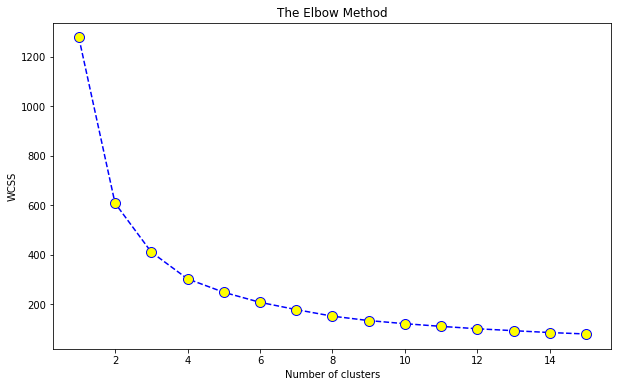

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 16), wcss, color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**WCSS (Within-Cluster-Sum-of-Squares)** is the sum of squares of the distances of each data point in all clusters to their respective centroids. We want to minimize WCSS and choose a number of clusters where WCSS minimization levels off. This type of survey is qualitative in nature.

Number of clusters selected for this project is 9.

## Train the K-Means Clustering model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualize the Clusters

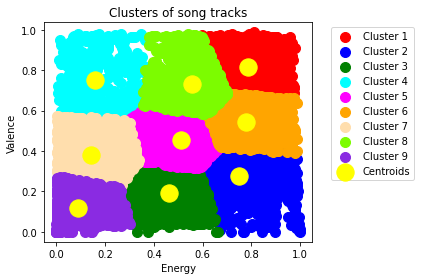

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'navajowhite', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'lawngreen', label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = 'blueviolet', label = 'Cluster 9')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of song tracks')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

## Get the Top 25 songs in each cluster
- Based on points closest to each cluster

In [ ]:
# Get the indices of the 25 closest elements to each centroid
for j in range(0, 9):
  d = kmeans.transform(X)[:, j]
  if j == 0:
    ind_1 = np.argsort(d)[::][:25]
  elif j == 1:
    ind_2 = np.argsort(d)[::][:25]
  elif j == 2:
    ind_3 = np.argsort(d)[::][:25]
  elif j == 3:
    ind_4 = np.argsort(d)[::][:25]
  elif j == 4:
    ind_5 = np.argsort(d)[::][:25]
  elif j == 5:
    ind_6 = np.argsort(d)[::][:25]
  elif j == 6:
    ind_7 = np.argsort(d)[::][:25]
  elif j == 7:
    ind_8 = np.argsort(d)[::][:25]
  else:
    ind_9 = np.argsort(d)[::][:25]

### Cluster 1 - High Energy, High Valence

In [ ]:
# Cluster 1 - High Energy, High Valence
tracks_1 = pd.DataFrame(dataset.iloc[ind_1, [1, 2]].values)
tracks_1.columns = ['Artist','Track']
tracks_1 = tracks_1.reset_index(drop=True)
tracks_1.index += 1 

pd.options.display.max_columns = 25
pd.options.display.max_rows = 25
tracks_1

,Artist,Track
1,Guaynaa,Chicharrón
2,AzChike,Strapped Up (feat. Mike Sherm and G-BO Lean)
3,Quality Control,Stripper Bowl
4,Migos,Stripper Bowl
5,Dimelo Flow,La Isla (with Sech & Dalex feat. Justin Quiles...
6,Bastille,Hangin'
7,Lunay,Soltera - Remix
8,G-Eazy,"West Coast (feat. Blueface, ALLBLACK & YG)"
9,G-Eazy,West Coast
10,J Balvin,COMO UN BEBÉ


### Cluster 2 - High Energy, Low Valence

In [ ]:
# Cluster 2 - Low Energy, Low Valence
tracks_2 = pd.DataFrame(dataset.iloc[ind_2, [1, 2]].values)
tracks_2.columns = ['Artist','Track']
tracks_2 = tracks_2.reset_index(drop=True)
tracks_2.index += 1 

pd.options.display.max_columns = 25
pd.options.display.max_rows = 25

tracks_2

,Artist,Track
1,Maggie Rogers,Back In My Body
2,Halsey,SUGA's Interlude
3,Post Malone,"Sunflower (Remix) [with Swae Lee, Nicky Jam, a..."
4,Machine Gun Kelly,I Think I'm OKAY (with YUNGBLUD & Travis Barker)
5,Tim McGraw,Thought About You
6,Lil Skies,Bad Girls (feat. Gucci Mane)
7,Ozzy Osbourne,Straight to Hell
8,Fat Joe,Hands on You
9,Jerry Di,Verano En París
10,The Game,40 Ounce Love


Ozzy Osbourne's 'Straight to Hell' pretty much sums up this cluster

### Cluster 3 - Mid-Energy, Low Valence

In [ ]:
# Cluster 3 - Mid-Energy, Low Valence
tracks_3 = pd.DataFrame(dataset.iloc[ind_3, [1, 2]].values)
tracks_3.columns = ['Artist','Track']
tracks_3 = tracks_3.reset_index(drop=True)
tracks_3.index += 1 

pd.options.display.max_columns = 25
pd.options.display.max_rows = 25
tracks_3

,Artist,Track
1,Doja Cat,Streets
2,Gucci Mane,Potential (feat. Lil Uzi Vert & Young Dolph)
3,H.E.R.,Slide
4,Kristen Anderson-Lopez,Some Things Never Change - Instrumental
5,Weyes Blood,Andromeda
6,Summer Walker,Grave
7,Labrinth,Forever
8,Maná,Rayando El Sol (feat. Pablo Alborán)
9,Dean Lewis,Chemicals
10,Kid Ink,Miami


### Cluster 4 - Low Energy, High Valence

In [ ]:
# Cluster 4 - Low Energy, High Valence
tracks_4 = pd.DataFrame(dataset.iloc[ind_4, [1, 2]].values)
tracks_4.columns = ['Artist','Track']
tracks_4 = tracks_4.reset_index(drop=True)
tracks_4.index += 1 

pd.options.display.max_columns = 25
pd.options.display.max_rows = 25
tracks_4

,Artist,Track
1,Ludwig van Beethoven,Beethoven: 33 Variations on a Waltz by Diabell...
2,Ludwig van Beethoven,Beethoven: 13 Variations on Dittersdorf's Arie...
3,Ludwig van Beethoven,Beethoven: 12 Variations on a Russian Dance fr...
4,Ludwig van Beethoven,"Violin Sonata No. 3 in E-Flat Major, Op. 12 No..."
5,Ludwig van Beethoven,Beethoven: 13 Variations on Dittersdorf's Arie...
6,Wolfgang Amadeus Mozart,"Adagio in C Major, K. 356"
7,Camila Cabello,Love Can Be Easy
8,Ludwig van Beethoven,"Beethoven: 22 Scottish Songs, WoO 156: No. 4, ..."
9,Ludwig van Beethoven,"Beethoven: 10 Variations on Salieri's Duet ""La..."
10,Wolfgang Amadeus Mozart,"Flute Quartet No. 1 in D Major, K. 285: III. R..."


Classical music by Beethoven dominates this list

### Cluster 5 - Mid-Energy, Mid-Valence

In [ ]:
# Cluster 5 - Mid-Energy, Mid-Valence
tracks_5 = pd.DataFrame(dataset.iloc[ind_5, [1, 2]].values)
tracks_5.columns = ['Artist','Track']
tracks_5 = tracks_5.reset_index(drop=True)
tracks_5.index += 1 

pd.options.display.max_columns = 25
pd.options.display.max_rows = 25
tracks_5

,Artist,Track
1,Anderson .Paak,Good Heels (feat. Jazmine Sullivan)
2,Junior H,La M4
3,Halsey,Without Me (with Juice WRLD)
4,Mt. Joy,Rearrange Us
5,gianni & kyle,do u even miss me at all?
6,iann dior,Needed
7,Tyga,Lightskin Lil Wayne
8,Tory Lanez,Beauty In The Benz (feat. Snoop Dogg)
9,Jonathan Groff,Get This Right - Outtake
10,Elderbrook,Something About You (with Rudimental) - Chill Mix


### Cluster 6 - High Energy, Mid-Valence

In [ ]:
# Cluster 6 - High Energy, Mid-Valence
tracks_6 = pd.DataFrame(dataset.iloc[ind_6, [1, 2]].values)
tracks_6.columns = ['Artist','Track']
tracks_6 = tracks_6.reset_index(drop=True)
tracks_6.index += 1 

pd.options.display.max_columns = 25
pd.options.display.max_rows = 25
tracks_6

,Artist,Track
1,Jhay Cortez,Easy
2,Foals,Like Lightning
3,Gryffin,Bye Bye (feat. Ivy Adara)
4,Cosculluela,Dime A Ver
5,Tee Grizzley,Heroes
6,Hitmaka,"Thot Box (feat. Meek Mill, 2 Chainz, YBN Nahmi..."
7,Aries,CAROUSEL
8,Big Thief,Not
9,Drake,The Motion
10,The Head and the Heart,Missed Connection


### Cluster 7 - Low Energy, Mid-Valence

In [ ]:
# Cluster 7 - Low Energy, Mid-Valence
tracks_7 = pd.DataFrame(dataset.iloc[ind_7, [1, 2]].values)
tracks_7.columns = ['Artist','Track']
tracks_7 = tracks_7.reset_index(drop=True)
tracks_7.index += 1 

pd.options.display.max_columns = 25
pd.options.display.max_rows = 25
tracks_7

,Artist,Track
1,Pietra Costa,Here Comes Santa Claus
2,Ludwig van Beethoven,"Beethoven: Andante for Piano in C Minor, WoO 211"
3,Vincent Sparro,Endings
4,Ludwig van Beethoven,"Beethoven: 26 Welsh Songs, WoO 155: No. 12, Wa..."
5,Jonas Holmes,Flying South
6,Serouj,Monmartre
7,Ludwig van Beethoven,Beethoven: Piano Sonata No. 18 in E-Flat Major...
8,Ludwig van Beethoven,Beethoven: Variations and Fugue in E-Flat Majo...
9,Ludwig van Beethoven,Beethoven: 13 Variations on Dittersdorf's Arie...
10,Ludwig van Beethoven,"Beethoven: 63 Irish Songs, Pt. 2, WoO 153: No...."


Classical music by Beethoven dominates this list

### Cluster 8 - Mid-Energy, High Valence

In [ ]:
# Cluster 8 - Mid-Energy, High Valence
tracks_8 = pd.DataFrame(dataset.iloc[ind_8, [1, 2]].values)
tracks_8.columns = ['Artist','Track']
tracks_8 = tracks_8.reset_index(drop=True)
tracks_8.index += 1 

pd.options.display.max_columns = 25
pd.options.display.max_rows = 25
tracks_8

,Artist,Track
1,maye,Tú
2,Ozuna,Patek
3,Jay Sean,With You
4,Yxngxr1,Tyler
5,Ryan Hurd,Diamonds or Twine
6,Yxngxr1,Rather Do
7,James Vickery,Pressure (with SG Lewis)
8,Stick Figure,World on Fire (feat. Slightly Stoopid)
9,BONES,"NoOffense,NoneTaken"
10,Jovanny Cadena Y Su Estilo Privado,Quiero Llorar y No Puedo


### Cluster 9 - Low Energy, Low Valence

In [ ]:
# Cluster 9 - Low Energy, Low Valence
tracks_9 = pd.DataFrame(dataset.iloc[ind_9, [1, 2]].values)
tracks_5.columns = ['Artist','Track']
tracks_9 = tracks_9.reset_index(drop=True)
tracks_9.index += 1 

pd.options.display.max_columns = 25
pd.options.display.max_rows = 25
tracks_9

,0,1
1,Ludwig van Beethoven,"Beethoven: Piano Sonata No. 15 in D Major, Op...."
2,Sergio Díaz De Rojas,Waltz
3,Ludwig van Beethoven,"Beethoven: Polyphonic Italian Songs, WoO 99: N..."
4,Ludwig van Beethoven,"Beethoven: Piano Concerto No. 3 in C Minor, Op..."
5,FINNEAS,Die Alone
6,Charles Bolt,You Are Peace
7,Ludwig van Beethoven,"Beethoven: 22 Scottish Songs, WoO 156: No. 5, ..."
8,Ludwig van Beethoven,Beethoven / Compl. Ries: Piano Sonata in C Maj...
9,Antonio Vivaldi,"Violin Concerto In E, RV 271 ""L'amoroso"": 2. C..."
10,Ludwig van Beethoven,"Beethoven: Sehnsucht, WoO 134: Second Setting...."


Classical music by Bach and Beethoven dominates this list

## Discussion
- Music genre info was not provided in this dataset. If we know the genre, we can further customize the Top 25 lists by having a Top 25 for each genre, which will give much better recommendations to the listener.
- Beethoven pretty much covers Low Energy music, no matter what the Valence range is.

## Conclusion
Music can be segmented into different clusters based on energy and valence. This segmentation can be done using other music quality features as well. The list of features are described [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). In general, music segmentation is used to recommend songs with similar features and to create customized Daily Mixes for the listener to encourage him/her to keep using the music-streaming app. This type of customization is central to the business model for many music streaming services provider and paves the way for the customer to become a lifelong subscriber and to be an influencer as a means to expand the subscriber base.